In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_7_descriptive = get_prompt("descriptive", 7)
prompt_7_natural = get_prompt("natural", 7)

prompt_7_descriptive, prompt_7_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Find any known binding or active sites. 4. Simulate for 1ps at 300 K. 5. Compute the RMSD. 6. Compute the radius of gyration over time. 7. Compute the SASA (solvent accessible surface area).',
 'Simulate 1LYZ for 1ps at 300 K. Report the secondary structure assignments of the downloaded PDB structure and any known binding or active sites. Compute the RMSD, SASA, and radius of gyration of the simulation.')

In [3]:
llm_model = "claude-3-opus-20240229"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_7_descriptive)

Thought: To complete the tasks, I will need to download the PDB file, analyze its structure, find binding/active sites, run a short simulation, and compute various analyses. I will start by downloading the PDB file.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I can analyze the secondary structure using the ComputeDSSP tool.

Action:
```
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1LYZ_010239",
    "target_frames": "first"
  }
}
```

Thought: Now that I have the secondary structure information, I can look for known binding and active sites for this protein using the UniProt tools.

Action:
```
{
  "action": "GetUniprotID",
  "action_input": {
    "query": "1LYZ"
  }
}
```

Thought: Now that I have the UniProt ID, I can retrieve the known binding and active sites for this protein.

Action:
```
{
  "action": "GetAllKnownSites",
  "action_input": {
    "query"

KeyError: 'Pressure'

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_010239: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_010239
 rec0_010244: dssp values for trajectory with id: 1LYZ_010239
 1LYZ_010406: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 


In [6]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_010239"))

In [7]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_010239", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [8]:
# make sure the sites were found
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="P17897")

"Active Sites: [{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}, {'start': 71, 'start_modifier': 'EXACT', 'end': 71, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}]\nNo known binding sites.\nNo other relevant sites."

In [9]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_7_natural)

Thought: To simulate 1LYZ, I first need to download the PDB file. I can use the PDBFileDownloader tool to get the PDB file.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I can use the ComputeDSSP tool to get the secondary structure assignments for the downloaded structure.

Action:
```
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1LYZ_010555",
    "target_frames": "first"
  }
}
```Thought: To get the known binding and active sites for 1LYZ, I can use the GetAllKnownSites tool from UniProt.

Action:
```
{
  "action": "GetAllKnownSites",
  "action_input": {
    "query": "1LYZ",
    "primary_accession": "P00698"
  }
}
```Here are the next steps to simulate 1LYZ and analyze the results:

Thought: Now that I have the PDB file and secondary structure/binding site information, I can set up and run a short 1ps simulation at 300K using the SetUpandRunFunction tool. 



({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [10]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_010555: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_010555
 rec0_010606: dssp values for trajectory with id: 1LYZ_010555
 1LYZ_010729: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_010749: Initial positions for simulation sim0_010749
 sim0_010749: Basic Simulation of Protein 1LYZ_010729
 rec0_010754: Simulation trajectory for protein 1LYZ_010729 and simulation sim0_010749
 rec1_010754: Simulation state log for protein 1LYZ_010729 and simulation sim0_010749
 rec2_010754: Simulation pdb frames for protein 1LYZ_010729 and simulation sim0_010749
 rmsd_010749: RMSD for 010749
 fig0_011240: RMSD plot for 010749
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_012245: Plot of SASA over time for 1LYZ
 rgy_rec0_010754: Radii of gyration per frame for rec0_010754
 fig0_012303: Plot of radii of gyration over time for rec0_010754


In [14]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_010555"))

In [15]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_010555", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [17]:
# make sure the sites were found
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="P00698")

"Active Sites: [{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': []}, {'start': 70, 'start_modifier': 'EXACT', 'end': 70, 'end_modifier': 'EXACT', 'description': '', 'evidences': []}]\nBinding Sites: [{'start': 119, 'start_modifier': 'EXACT', 'end': 119, 'end_modifier': 'EXACT', 'description': '', 'evidences': []}]\nNo other relevant sites."

In [18]:
# make sure trajectory and topology exist
traj_path_2 = registry_2.get_mapped_path("rec0_010754")
top_path_2 = registry_2.get_mapped_path("top_sim0_010749")

assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)

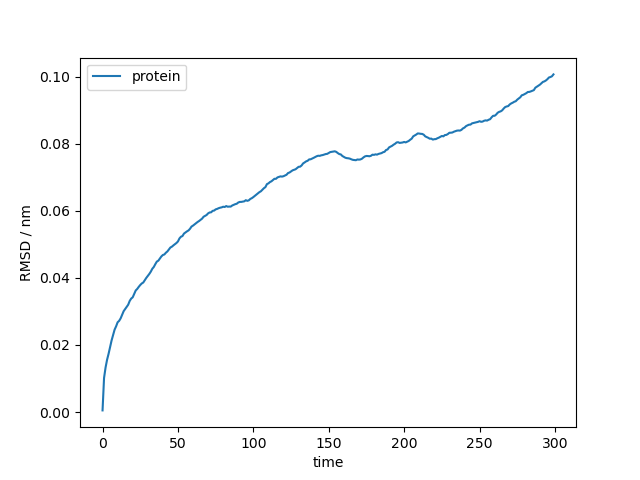

In [19]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_011240'))

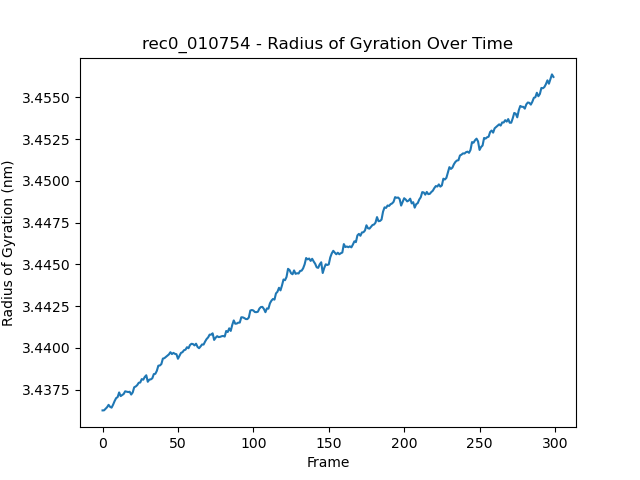

In [20]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_012303'))

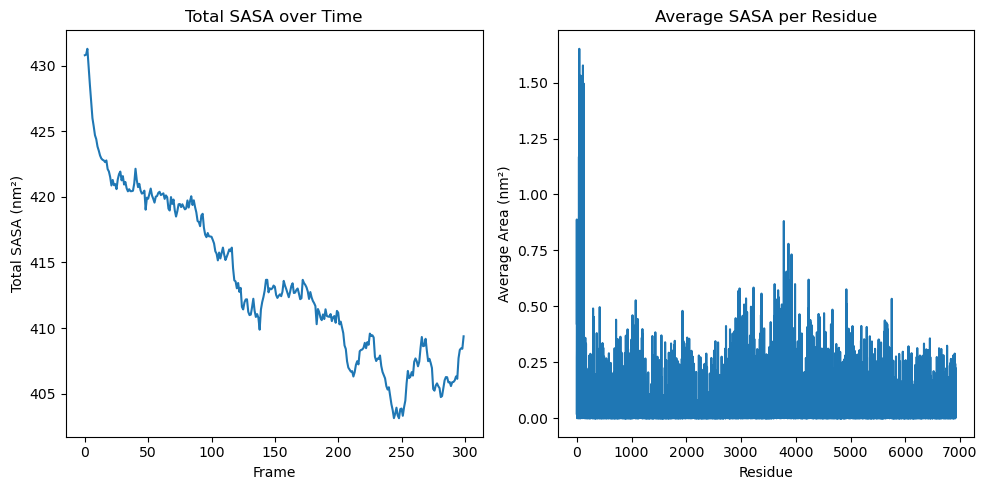

In [21]:
# make sure sasa plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_012245'))